## 1-dimensional
just 1 observable

In [1]:
import numpy as np, pandas
import matplotlib.pyplot as plt

In [2]:
from Functions.basic_functions_gaussian import numerical_props, analytical_props, flatten

- plot limit values of loss, chi2 and S rel. and the depth
- in which cases you might overcome the barrier
- compare with Metropolis sampling
- include the Jeffreys prior: how does it modify the minimum (MAP)?
- effect of correlated frames
- realistic case study: RNA oligomers

### 1. limit values

Analytical estimate:

$\mathcal L_{lim} \simeq \frac{1}{2} \Bigl(\frac{\sigma\bar g(N) - g_{exp}}{\sigma_{exp}}\Bigr)^2 + \alpha \,\log N$

where the max. value of $N$ normally distributed random values $\mathcal N(0,1)$ is estimated as

$\bar g(N) = \sqrt 2 \, \mathrm{inverf}(1-2/N)$.

This is the estimate of $\bar g(N)$ in 1dim (namely, just 1 observable), where we also have the boundaries

$\sqrt{2\log N} - 1 \leq \bar g(N) \leq \sqrt{2\log N}$

so $\bar g (N)\sim \sqrt{2\log N}$. In more than 1d. we can show 

$\bar g(N) \leq \frac{\sqrt{2}}{2} (D+1) \sqrt{\log N}$.

So, at the leading order in $N$, it is

$\mathcal L_{lim} \leq \Bigl[ \frac{(D+1)^2}{4} (\sigma/\sigma_{exp})^2 + \alpha \Bigr]\log N + O(\sqrt{\log N})$

In [3]:
# alpha = 1.
# sigma = 0.1
# gexp = 0.3
# sigma_exp = 0.05

alpha = 0.5
sigma = 0.5
gexp = 1.7
sigma_exp = 0.6


In [4]:
log_ns = np.linspace(1, 6, 10)
ns = np.unique(np.array([int(10**log_n) for log_n in log_ns]))

out1 = {}
out2 = {}

for n in ns:
    
    print(n)

    out1[n] = {}
    
    for m in range(5):
        out1[n][m] = numerical_props(n, sigma, gexp, sigma_exp, alpha, seed=m)
    
    out2[n] = analytical_props(n, sigma, gexp, sigma_exp, alpha, True)

10
35
129
464
1668
5994
21544
77426
278255
1000000


In [5]:
df = pandas.DataFrame(out1[ns[0]]).loc[['min_lambda', 'min_loss', 'min_avg', 'gbar', 'lim_loss', 'lim_loss_num', 'lim_chi2', 'lim_dkl', 'dV']].T
df.insert(0, 'n_frames', ns[0])

for n in ns[1:]:
    df2 = pandas.DataFrame(out1[n]).loc[['min_lambda', 'min_loss', 'min_avg', 'gbar', 'lim_loss', 'lim_loss_num', 'lim_chi2', 'lim_dkl', 'dV']].T
    df2.insert(0, 'n_frames', n)
    df = pandas.concat([df, df2])

df.insert(0, 'seed', df.index)
df.index = range(df.shape[0])

# df.to_csv('Results/scaling_num.txt')
df

,seed,n_frames,min_lambda,min_loss,min_avg,gbar,lim_loss,lim_loss_num,lim_chi2,lim_dkl,dV
0,0,10,[-6.390800631318304],2.443498,[0.5496106507283638],0.652,"[[2.6767147030298233], [8.708986123753103]]","[2.6767135, 8.708983]","[3.050845, 15.115385]","[2.3025818, 2.3025818]",0.233216
1,1,10,[-7.464081486754606],2.804361,[0.3562766539517995],0.452678,"[[3.312143015921408], [8.831739749688825]]","[3.3121412, 8.8317375]","[4.3217006, 15.360894]","[2.3025818, 2.3025818]",0.507781
2,2,10,[-5.0606913374776346],1.885737,[0.7890274601972977],0.899854,"[[2.0405065954268786], [12.99946656817943]]","[2.040505, 12.99948]","[1.7784281, 23.696348]","[2.3025818, 2.3026123]",0.154768
3,3,10,[-2.035110806637417],0.822125,[1.333692978607326],1.6615,"[[1.1533512528987317], [13.467246006642352]]","[1.1533649, 13.467259]","[0.004117427, 24.631907]","[2.3026123, 2.3026123]",0.33124
4,4,10,[-5.261379812257076],2.124384,[0.7525572216124088],0.831862,"[[2.1980475388826193], [9.97618375547112]]","[2.1980462, 9.9749]","[2.0935104, 17.649721]","[2.3025818, 2.3000793]",0.073662
5,0,35,[-6.41932945377992],2.617104,[0.5440826158014693],0.683232,"[[3.213531953178328], [13.158221728856422]]","[3.2135375, 13.158226]","[2.871716, 22.761093]","[3.555359, 3.555359]",0.596433
6,1,35,[-4.61142056305009],1.846544,[0.8699152942507606],1.058919,"[[2.3484856481228475], [14.745141685022999]]","[2.348491, 14.745146]","[1.141623, 25.934933]","[3.555359, 3.555359]",0.501947
7,2,35,[-4.951909748303126],1.950646,[0.8084417507307162],1.028351,"[[2.4042182384701705], [13.625848052427115]]","[2.4042237, 13.625854]","[1.2530885, 23.696348]","[3.555359, 3.555359]",0.453577
8,3,35,[-2.7757070540222606],1.204274,[1.2003754354833878],1.6615,"[[1.7797327371464158], [14.093627490890036]]","[1.7797382, 14.093633]","[0.004117427, 24.631907]","[3.555359, 3.555359]",0.575464
9,4,35,[-4.53327189286178],1.813024,[0.8838973735737663],1.126365,"[[2.2346984964587677], [12.350238832536194]]","[2.234704, 12.3502445]","[0.9140489, 21.14513]","[3.555359, 3.555359]",0.42168


In [6]:
def std_on_mean(x): return np.std(x)/np.sqrt(len(x))
df_pivot = pandas.pivot_table(df, values=['min_loss', 'dV'], index=['n_frames'], aggfunc=['mean', 'std', 'first', std_on_mean])

df_pivot['mean']['dV']

n_frames
10         0.260133
35         0.509820
129        0.964481
464        1.394622
1668       2.010554
5994       2.712563
21544      3.327673
77426      4.361842
278255     5.086512
1000000    6.141877
Name: dV, dtype: float64

In [7]:
def compute_mean_std(out, s, j = None):
    
    mean = []
    std_mean = []
    
    for n in out.keys():
        mean.append(np.mean(flatten(out[n], s, j)))
        std_mean.append(np.std(flatten(out[n], s, j))/np.sqrt(len(out[n].keys())))
        
    
    return np.array(mean), np.array(std_mean)

In [8]:
compute_mean_std(out1, 'min_loss')

(array([2.01602085, 1.88631859, 1.77943592, 1.7225713 , 1.72199857,
        1.6946048 , 1.69421351, 1.67996752, 1.68181353, 1.67895548]),
 array([0.30055414, 0.20102973, 0.07937165, 0.02540226, 0.01665174,
        0.01701275, 0.00496818, 0.00331852, 0.00142789, 0.00173951]))

(10, 1000000)

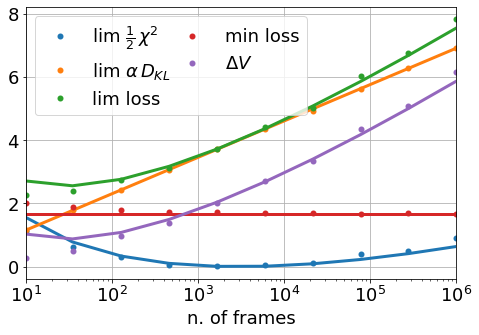

In [9]:
j = 0  # 0 or 1, depending on max/min g

plt.rcParams.update({
    'lines.linewidth': 3,
    'lines.markeredgewidth': 3,
    'font.size': 18,
    'figure.autolayout': True})

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']  # ,'tab:brown','tab:pink',
          #   'tab:gray','tab:olive','tab:cyan']

mean, std = compute_mean_std(out1, 'lim_chi2', j)

plt.figure(figsize=(7, 5))
plt.plot(ns, 1/2*np.array(mean), '.', label=r'lim $\frac{1}{2} \, \chi^2$', c=colors[0])
plt.plot(ns, 1/2*np.array(flatten(out2, 'lim_chi2')), c=colors[0])

# overestimate of the chi2 with sqrt(log(n))
# plt.plot(ns, 1/2*((sigma*np.sqrt(2*np.log(ns)) - gexp)/sigma_exp)**2, label='1/2 chi2 est')

mean, std = compute_mean_std(out1, 'lim_dkl', j)
plt.plot(ns, alpha*np.array(mean), '.', label=r'lim $\alpha\,D_{KL}$', c=colors[1])
plt.plot(ns, alpha*np.array(flatten(out2, 'lim_dkl')), c=colors[1])

mean_loss, std_loss = compute_mean_std(out1, 'lim_loss_num', j)
plt.plot(ns, mean_loss, '.', label='lim loss', c=colors[2])
plt.plot(ns, flatten(out2, 'lim_loss'), c=colors[2])

mean_loss, std_loss = compute_mean_std(out1, 'min_loss')
plt.plot(ns, mean_loss, '.', label='min loss', c=colors[3])
plt.plot(ns, flatten(out2, 'min_loss'), c=colors[3])

mean, std = compute_mean_std(out1, 'dV')
# plt.plot(ns, out1['dV'], '.', label='delta V')
plt.plot(ns, mean, '.', label='$\Delta V$', c=colors[4])
# plt.errorbar(ns, mean - std, mean + std)
plt.plot(ns, flatten(out2, 'dV'), c=colors[4])

plt.grid()
plt.xscale('log')
plt.xlabel('n. of frames')
# plt.yscale('log')
plt.legend(ncol=2, columnspacing=0.2)
plt.xlim([ns[0], ns[-1]])

# plt.savefig('Manuscript_images/ex3_scaling.pdf', format='pdf', bbox_inches='tight')

### 2. when you might overcome the barrier

let's express $g_{exp}$ in units of $\sigma$ ($g_{exp} = a\sigma$), so we get an expression for the ratio $\sigma/\sigma_{exp}$ as a function of $\mathcal L_{lim}, \alpha, a, N$

but you are not considering the min. loss value, which anyway is almost constant around $\frac{1}{2} \frac{\alpha g_{exp}}{\sigma^2}$ if $\sigma_{exp}$ is very small (so that matching the $\chi^2$ is preferred to moving away from $P_0$)

In [7]:
from scipy.special import erfinv

In [18]:
bar_g = lambda n : np.sqrt(2)*erfinv(1 - 2/n)

def ratio(loss_lim, alpha, a, n):
    diff = loss_lim - alpha*np.log(n)
    # assert diff > 0, 'error: loss lim. value < alpha DKL'
    if diff > 0 : val = np.sqrt((loss_lim - alpha*np.log(n))*2)/np.abs(bar_g(n) - a)
    else: val = None
    return val

In [19]:
ratio(10, 0.1, 3, 100000)

3.3258440771932523

In [20]:
loss_lim = 5
alpha = 0.5
a = 3

log_ns = np.arange(1, 6, 0.1)
ns = np.unique([np.int64(k) for k in 10**log_ns])

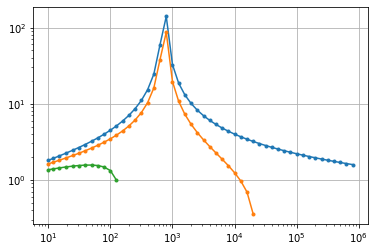

In [21]:
vals = [ratio(loss_lim, 0.1, a, n) for n in ns]
plt.plot(ns, vals, '.-')

vals = [ratio(loss_lim, 0.5, a, n) for n in ns]
plt.plot(ns, vals, '.-')

vals = [ratio(loss_lim, 1, a, n) for n in ns]
plt.plot(ns, vals, '.-')

plt.grid()
plt.xscale('log')
plt.yscale('log')

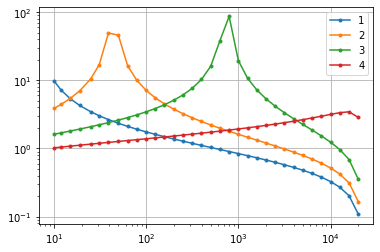

In [22]:
for a in [1, 2, 3, 4]:
    vals = [ratio(loss_lim, 0.5, a, n) for n in ns]
    plt.plot(ns, vals, '.-', label=a)

plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.legend()

### 3. compare with Metropolis sampling

- use for `alpha`, `sigma`, `gexp`, `sigma_exp` the same values as above
- fix the n. of frames `n` (since above we perform a scan over it)

In [12]:
from Functions.basic_functions_bayesian import compute_single, compute, run_Metropolis
from Functions.basic_functions_gaussian import loss_fun

In [13]:
n = 5000

p0 = np.ones(n)/n
g = np.random.normal(0, sigma, size=n)

In [14]:
def energy_function(x, if_jeffreys = False):

    out = loss_fun(x, p0, g, gexp, sigma_exp, alpha, if_cov=if_jeffreys)

    if if_jeffreys:
        energy = out[0]
        cov = out[-1]
        jeff = np.log(np.linalg.det(cov))
        energy -= jeff

    else:
        energy = out

    return np.array([energy])

Text(0.5, 0, 'n frames')

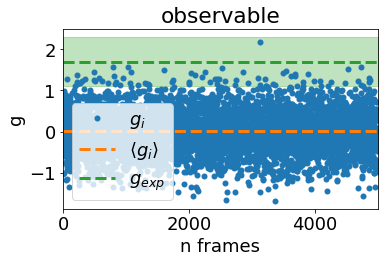

In [15]:
plt.rcParams['lines.linewidth'] = 3

plt.plot(g, '.', label=r'$g_i$')

plt.plot([-5, len(g) + 5], [np.mean(g), np.mean(g)], '--', label=r'$\langle g_i\rangle$')  # ,color='tab:blue')

plt.plot([-5, len(g) + 5], [gexp, gexp], '--', label=r'$g_{exp}$')
plt.fill_between([-5, len(g) + 5], [gexp - sigma_exp, gexp - sigma_exp], [gexp + sigma_exp, gexp + sigma_exp], alpha=0.3, color='tab:green')

plt.title('observable')
plt.legend(loc='lower left')
plt.xlim([-5, len(g) + 5])
plt.ylabel('g')
plt.xlabel('n frames')

In [16]:
out = numerical_props(n, np.array([g]), gexp, sigma_exp, alpha, if_scan=True, delta_lambda=100)

out_th = analytical_props(n, sigma, gexp, sigma_exp, alpha)

print(out_th.dV)

density is NaN because metric has been evaluated as  [[-1.77635684e-15]]
2.5851777427074856


/home/ivang/Documenti/my_github/Jeffreys_prior/Functions/basic_functions_bayesian.py:236: RuntimeWarning: invalid value encountered in sqrt
  self.std_g = np.sqrt(self.var_g)
/home/ivang/Documenti/my_github/Jeffreys_prior/Functions/basic_functions_bayesian.py:88: RuntimeWarning: invalid value encountered in sqrt
  density = np.sqrt(np.linalg.det(cov))
/home/ivang/Documenti/my_github/Jeffreys_prior/Functions/basic_functions_bayesian.py:134: RuntimeWarning: invalid value encountered in sqrt
  density = np.sqrt(np.linalg.det(metric))


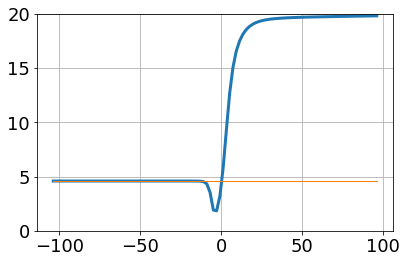

In [17]:
plt.plot(out.scan_lambdas, out.scan_results['lossf'])
plt.plot([np.min(out.scan_lambdas), np.max(out.scan_lambdas)], np.min(out.lim_loss_num)*np.ones(2), linewidth=1)
plt.ylim([0, 20])
plt.grid()

density is NaN because metric has been evaluated as  [[-1.77635684e-15]]


/home/ivang/Documenti/my_github/Jeffreys_prior/Functions/basic_functions_bayesian.py:236: RuntimeWarning: invalid value encountered in sqrt
  self.std_g = np.sqrt(self.var_g)
/home/ivang/Documenti/my_github/Jeffreys_prior/Functions/basic_functions_bayesian.py:88: RuntimeWarning: invalid value encountered in sqrt
  density = np.sqrt(np.linalg.det(cov))
/home/ivang/Documenti/my_github/Jeffreys_prior/Functions/basic_functions_bayesian.py:134: RuntimeWarning: invalid value encountered in sqrt
  density = np.sqrt(np.linalg.det(metric))
/tmp/ipykernel_8483/2724155320.py:12: RuntimeWarning: divide by zero encountered in log
  adj_loss = out.scan_results['lossf'] - np.log(out_compute['jeffreys'])
/home/ivang/.local/lib/python3.9/site-packages/numpy/lib/arraysetops.py:89: RuntimeWarning: invalid value encountered in subtract
  return ary[1:] - ary[:-1]


Text(0.5, 1.0, 'derivative')

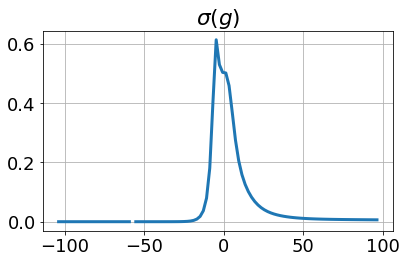

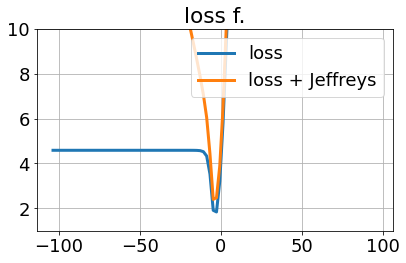

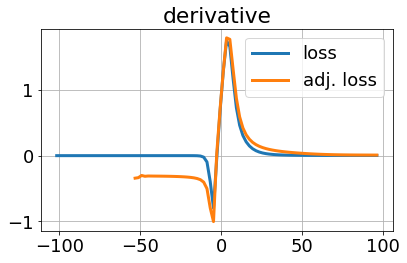

In [18]:
out_compute = compute(out.scan_lambdas, p0, g, gexp, sigma_exp, alpha)

plt.plot(out.scan_lambdas, out_compute['std_g'])
plt.title('$\sigma(g)$')
plt.grid()

# plot loss function
plt.figure()
plt.plot(out.scan_lambdas, out.scan_results['lossf'], label='loss')
plt.title('loss f.')

adj_loss = out.scan_results['lossf'] - np.log(out_compute['jeffreys'])

plt.plot(out.scan_lambdas, adj_loss, label='loss + Jeffreys')
plt.grid()
plt.legend()
# plt.yscale('log')
plt.ylim([1, 10])

plt.figure()

def num_der(x, y):
    dy_dx = np.ediff1d(y)/np.ediff1d(x)
    return dy_dx

plt.plot(out.scan_lambdas[1:], num_der(out.scan_lambdas, out.scan_results['lossf']), label='loss')
plt.plot(out.scan_lambdas[1:], num_der(out.scan_lambdas, adj_loss), label='adj. loss')
plt.grid()
plt.legend()
plt.title('derivative')

In [20]:
my_energy_function = lambda x : energy_function(x, False)

out_Metropolis = run_Metropolis(np.zeros(1), 5., my_energy_function, n_steps=10000, i_print=1000)

  1%|          | 106/10000 [00:00<00:18, 530.87it/s]

0


 11%|█         | 1079/10000 [00:01<00:12, 693.60it/s]

1000


 21%|██        | 2115/10000 [00:02<00:09, 820.61it/s]

2000


 31%|███▏      | 3144/10000 [00:04<00:07, 904.30it/s]

3000


 42%|████▏     | 4172/10000 [00:05<00:06, 923.72it/s]

4000


 52%|█████▏    | 5156/10000 [00:06<00:05, 851.92it/s]

5000


 62%|██████▏   | 6176/10000 [00:07<00:04, 924.67it/s]

6000


 71%|███████   | 7100/10000 [00:08<00:03, 915.80it/s]

7000


 81%|████████  | 8106/10000 [00:09<00:02, 872.42it/s]

8000


 91%|█████████ | 9121/10000 [00:10<00:00, 917.30it/s]

9000


100%|██████████| 10000/10000 [00:11<00:00, 837.63it/s]


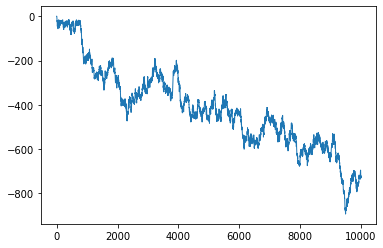

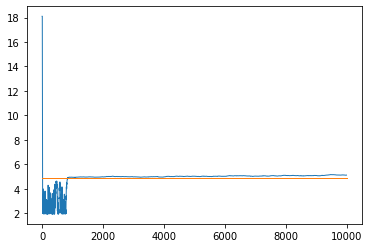

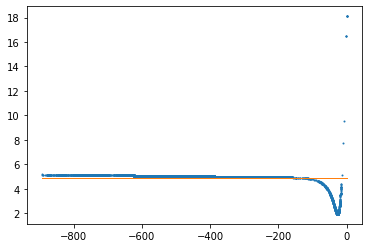

In [15]:
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 2

plt.plot(out_Metropolis[0])

plt.figure()
plt.plot(out_Metropolis[1])
plt.plot([0, len(out_Metropolis[0])], out.lim_loss_num[0]*np.ones(2))

plt.figure()
plt.plot(out_Metropolis[0], out_Metropolis[1], '.')
plt.plot([np.min(out_Metropolis[0]), np.max(out_Metropolis[0])], out.lim_loss_num[0]*np.ones(2))

In [5]:
from basic_functions_gaussian import Group_points

In [17]:
gp = Group_points(out_Metropolis[1], tolerance=0.1, if_diff=True, threshold=25)

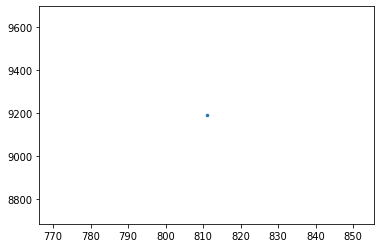

In [18]:
plt.rcParams['lines.markersize'] = 5
plt.plot(gp.whs_first, gp.whs_len, '.')


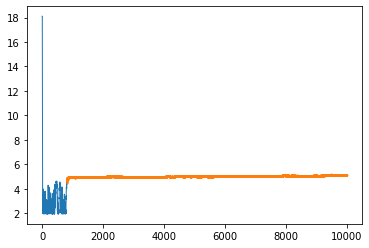

In [19]:
plt.rcParams['lines.markersize'] = 2

plt.plot(out_Metropolis[1])
plt.plot(gp.whs_flat, out_Metropolis[1][gp.whs_flat], '.')

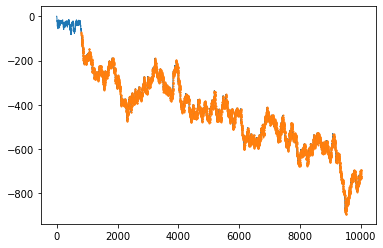

In [20]:
plt.plot(out_Metropolis[0])
plt.plot(gp.whs_flat, out_Metropolis[0][gp.whs_flat], '.')

In [21]:
my_energy_function = lambda x : energy_function(x, True)

out_J_Metropolis = run_Metropolis(np.zeros(1), 5., my_energy_function, n_steps=10000)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


In [22]:
gpJ = Group_points(out_J_Metropolis[1], tolerance=0.1, if_diff=True, threshold=25)

In [23]:
gpJ

       dif: array([0.        , 3.023405  , 4.7319317 , ..., 0.32395887, 0.39399576,
                   1.0712256 ], dtype=float32)
       whs: []
 whs_first: array([], dtype=int64)
  whs_flat: []
   whs_len: array([], dtype=int64)

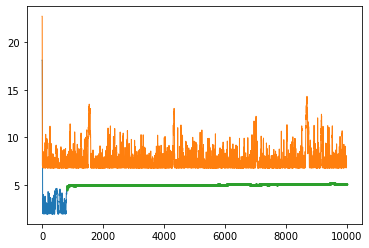

In [24]:
i = 1

plt.plot(out_Metropolis[i])
plt.plot(out_J_Metropolis[i])

plt.plot(gp.whs_flat, out_Metropolis[i][gp.whs_flat], '.')
plt.plot(gpJ.whs_flat, out_J_Metropolis[i][gpJ.whs_flat], '.')

(0.0, 10.0)

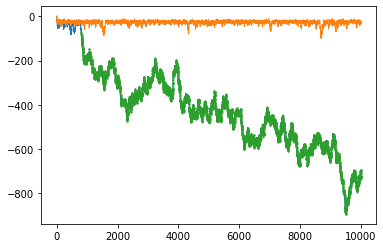

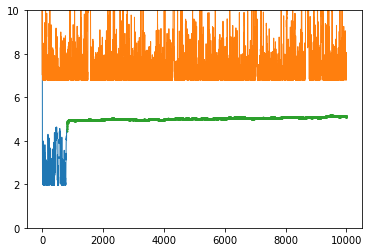

In [25]:
plt.rcParams['lines.linewidth'] = 1

plt.plot(out_Metropolis[0])
plt.plot(out_J_Metropolis[0])
plt.plot(gp.whs_flat, out_Metropolis[0][gp.whs_flat], '.')

plt.figure()
plt.plot(out_Metropolis[1])
plt.plot(out_J_Metropolis[1])
plt.plot(gp.whs_flat, out_Metropolis[1][gp.whs_flat], '.')
plt.ylim([0, 10])

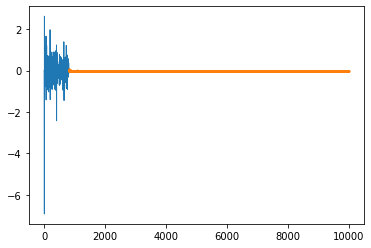

In [26]:
dif = np.ediff1d(out_Metropolis[1])
dif_J = np.ediff1d(out_J_Metropolis[1])

plt.plot(dif)
plt.plot(gp.whs_flat, dif[gp.whs_flat], '.')

# plt.plot(mov_average(dif, 10))


# plt.plot(dif_J)
# plt.xlim([7000, 9000])

In [27]:
mu = np.mean(out_Metropolis[0])
std = np.std(out_Metropolis[0])

mu_J = np.mean(out_J_Metropolis[0])
std_J = np.std(out_J_Metropolis[0])

print(mu, std)
print(mu_J, std_J)

mini = np.min(out_Metropolis[0])
mini_J = np.min(out_J_Metropolis[0])

print(mini, mini_J)

print(mu - 5*std)
print(mu_J - 5*std_J)

-416.41852530806915 186.51060507976203
-27.930758364628574 9.475278414525091
-892.2340695718925 -101.2008942829731
-1348.9715507068793
-75.30715043725402


In [28]:
print('acceptance: ', out_Metropolis[2], out_J_Metropolis[2])

acceptance:  0.9853 0.7331


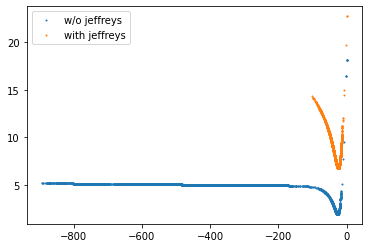

In [29]:
plt.plot(out_Metropolis[0], out_Metropolis[1], '.', label='w/o jeffreys')
plt.plot(out_J_Metropolis[0], out_J_Metropolis[1], '.', label='with jeffreys')
plt.legend()

In [30]:
first_time = gp.whs_first[0]

first_time

811

#### now, repeat
- for different Metropolis samplings
- for different random generation of the observables

In [14]:
# from tqdm import tqdm
import jax
import jax.numpy as jnp

from joblib import Parallel, delayed
from basic_functions_gaussian import Group_points, sample_and_group
from basic_functions_bayesian import run_Metropolis, langevin_sampling

# from jax import config
# config.update("jax_enable_x64", True)

ImportError: cannot import name 'sample_and_group' from 'basic_functions_gaussian' (/home/ivang/Documenti/my_github/Jeffreys_prior_small/basic_functions_gaussian.py)

##### landscape given by the posterior

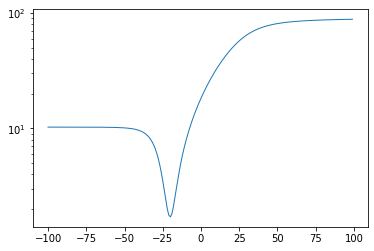

In [64]:
my_energy_function = lambda x : energy_function(np.array(x), False)

x = np.arange(-100, 100, 1)

my_values = []

for x_single in x:
    my_values.append(my_energy_function(x_single*np.ones(1)))

plt.plot(x, my_values)
plt.yscale('log')

In [65]:
n_iter = 3
random_states = np.arange(n_iter)

starting_point = out.min_lambda
dx = 5.

# out_Metropolis, gp = sample_and_group(starting_point, dx, my_energy_function, random_states[0])

results = Parallel(n_jobs=n_iter)(delayed(sample_and_group)(starting_point, dx, my_energy_function,
    seed) for seed in random_states)


/home/ivang/.local/lib/python3.9/site-packages/joblib/externals/loky/backend/fork_exec.py:43: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


00

0
2000
2000
2000
4000
4000
4000
6000
6000
6000
8000
8000
8000


In [66]:
results[0][1]

       dif: array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
                   0.54852295], dtype=float32)
       whs: []
 whs_first: array([], dtype=int64)
  whs_flat: []
   whs_len: array([], dtype=int64)

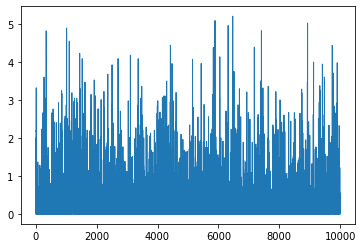

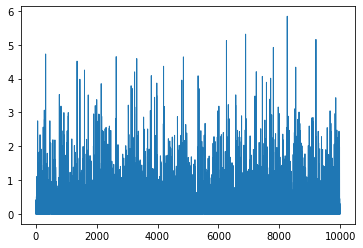

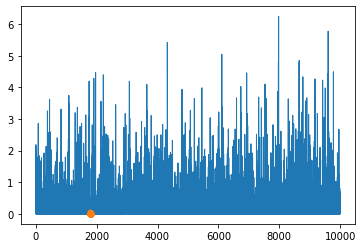

In [67]:
for i in range(len(results)):
    gp = results[i][1]
    plt.figure()
    plt.plot(gp.dif)
    plt.plot(gp.whs_flat, gp.dif[gp.whs_flat], '.')

### 4. effect of correlations

In [3]:
import sys

In [4]:
sys.path.append('../correlated_dirichlet')
from basic_correlations import autocorrelated_series

[[0.0003757056770443169, 0.9993502220446132], [0.007182733444258905, 1.0004310527988496], [0.00408787192231233, 0.9895254265123588], [-0.03782877354917045, 0.9836078839040449], [0.09334408974546636, 1.012399689972422]]


/u/i/igilardo/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


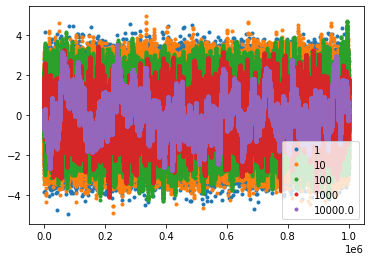

In [6]:
n = np.int64(1e6)

vals = []

for tau in [1, 10, 100, 1000, 1e4]:
    g = autocorrelated_series(n, tau)
    plt.plot(g, '.', label=tau)
    vals.append([np.mean(g), np.std(g)])

plt.legend()
print(vals)

[[0.0017541672681460696, 0.9800632990693868], [0.006794350718322064, 1.005189464194876], [0.011528697901118708, 0.9966906644891889], [-0.04409268485412697, 0.9864274846901046], [0.000499686483715601, 0.9946450702120474], [-0.008509331978552425, 1.0069634610515452], [-0.009782235134997925, 1.009168110247563], [0.01474939616327986, 0.9874792623097772], [-0.011612654642315989, 1.0068073526930728], [0.019071820859321128, 0.9980155742416728]]
[[0.0956605878574782, 1.0086099853527963], [-0.058771413920220276, 0.9928003987469725], [-0.0641133265517477, 1.0092835407543124], [0.07369629732450896, 1.0240623200080712], [-0.010884323630233865, 1.009599409069678], [-0.08683768494310301, 1.0194339252155278], [-0.023741715559730373, 0.9835968982666251], [-0.0014408918535159458, 0.9601839533855321], [-0.02877081622949006, 1.0020005893361115], [0.01069080451544726, 1.002071248019266]]
[[-0.18954204336608468, 0.8751769401634505], [-0.18043738733650247, 0.9549938840320257], [-0.08379628696906156, 0.96286

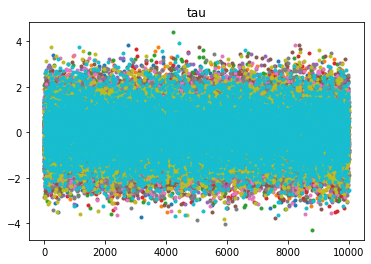

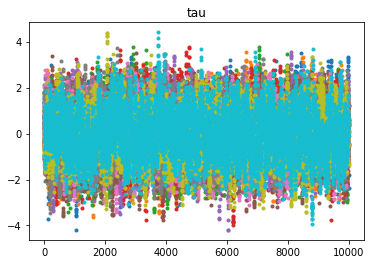

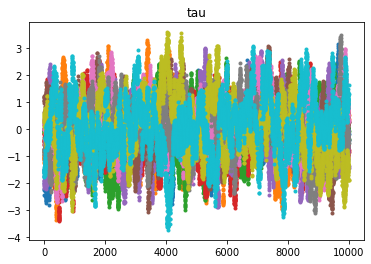

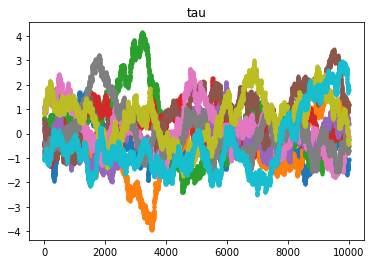

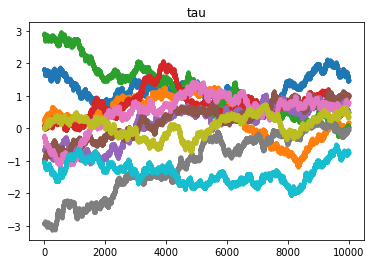

In [56]:
for tau in [1, 10, 100, 1000, 1e4]:
    vals = []
    plt.figure()
    
    for m in range(10):
        g = autocorrelated_series(n, tau)
        plt.plot(g, '.')
        vals.append([np.mean(g), np.std(g)])

    plt.title('tau')
    print(vals)

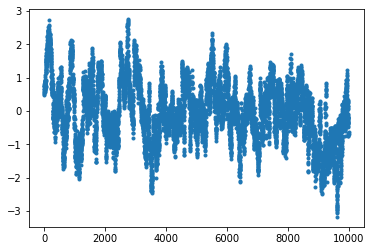

In [51]:
n = 10000
tau = 100

g = autocorrelated_series(n, tau)

plt.plot(g, '.')

In [52]:
np.std(g)

0.8994947792619705